# Caso Práctico 1º.

### Eligiendo Turno de Trabajo en la Cafeteria

Responde las preguntas y argumenta.

In [18]:
#Librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**0. Carga el dataset de SEABORN de "TIPS"**

In [19]:
df = sns.load_dataset("tips")
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


**1. ¿Qué día de trabajo es el favorito de los clientes?**

In [20]:
#Días ordenadas por defecto con value_count
dias = df['day'].value_counts()
print(dias)

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


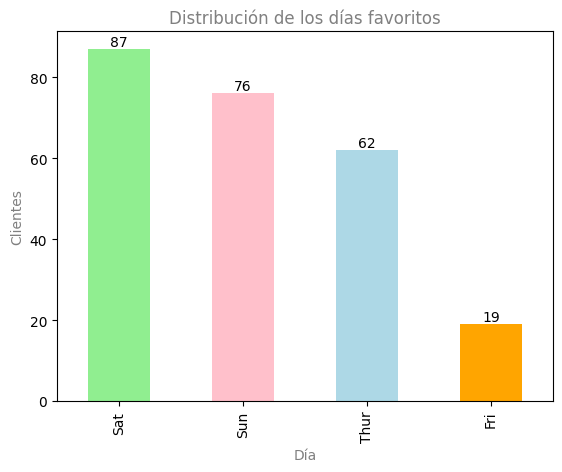

In [21]:
#Crear un gráfico de barras
dias.plot(kind='bar', color=['lightgreen','pink','lightblue','orange'])

# Añadir títulos y etiquetas
plt.title('Distribución de los días favoritos', color='grey')
plt.xlabel('Día', color='grey')
plt.ylabel('Clientes', color='grey')

for i, v in enumerate(dias):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

<font color='darkviolet'> ***Respuesta:*** *El día favorito de los clientes es el sábado con la mayor cantidad de mesas (cuentas). Los fines de semana en general (sábado y domingo) son preferidos sobre los días de semana. Eso puede sugerir que trabajar los lines de semana podría ser más ventajoso que en los otros días si pensamos que la probabilidad de tener más propina es mayor cuando tengamos más mesas. Sin embargo, se nesesita analizar más datos para una conclusion definitiva.*

**2. ¿Que dia de la semana tiene más mujeres que hombres como clientes?**

In [22]:
genero = df['sex'].value_counts()
genero

sex
Male      157
Female     87
Name: count, dtype: int64

In [23]:
#size() para contar el número de clientes para cada combinación de día y sexo
#unstack para reorganizar los datos y tener un formato más legible.

df_genero = df.groupby(['day', 'sex']).size().unstack(fill_value=0)
print(df_genero)

sex   Male  Female
day               
Thur    30      32
Fri     10       9
Sat     59      28
Sun     58      18


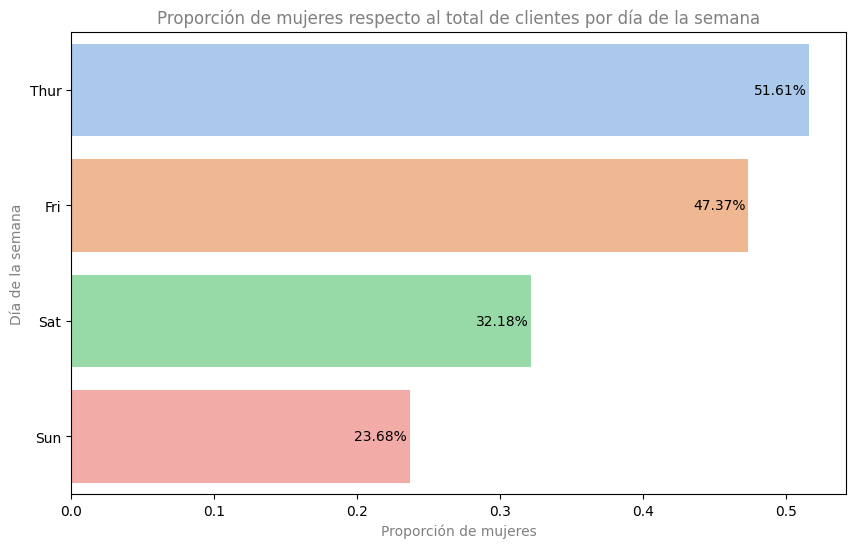

In [25]:
#Calcular la proporción de mujeres respecto al total por cada día
df_genero['female_ratio'] = df_genero['Female'] / (df_genero['Male'] + df_genero['Female'])

#Ordenar los días de la semana según la proporción de mujeres (de mayor a menor)
dias_ordenadas = df_genero['female_ratio'].sort_values(ascending=False).index

#Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='female_ratio', y=dias_ordenadas, data=df_genero.loc[dias_ordenadas], hue=dias_ordenadas, palette='pastel', legend=False)
plt.title('Proporción de mujeres respecto al total de clientes por día de la semana', color='grey')
plt.xlabel('Proporción de mujeres', color='grey')
plt.ylabel('Día de la semana', color='grey')

#Añadir etiquetas a las barras
for i in ax.containers:
    ax.bar_label(i, fmt=lambda x: f'{x*100:.2f}%', label_type='edge', padding=-40)

plt.show()

<font color='darkviolet'> ***Respuesta:*** *El jueves es el día con la mayor proporción de mujeres como clientes en comparación con los hombres, con un 51.61%. Todos los otros días hay más hombres que mujeres quienes visitan el restaurante.*

**3. ¿Crees que el hecho de ser fumador influye considerablemente en el total de la cuenta?**

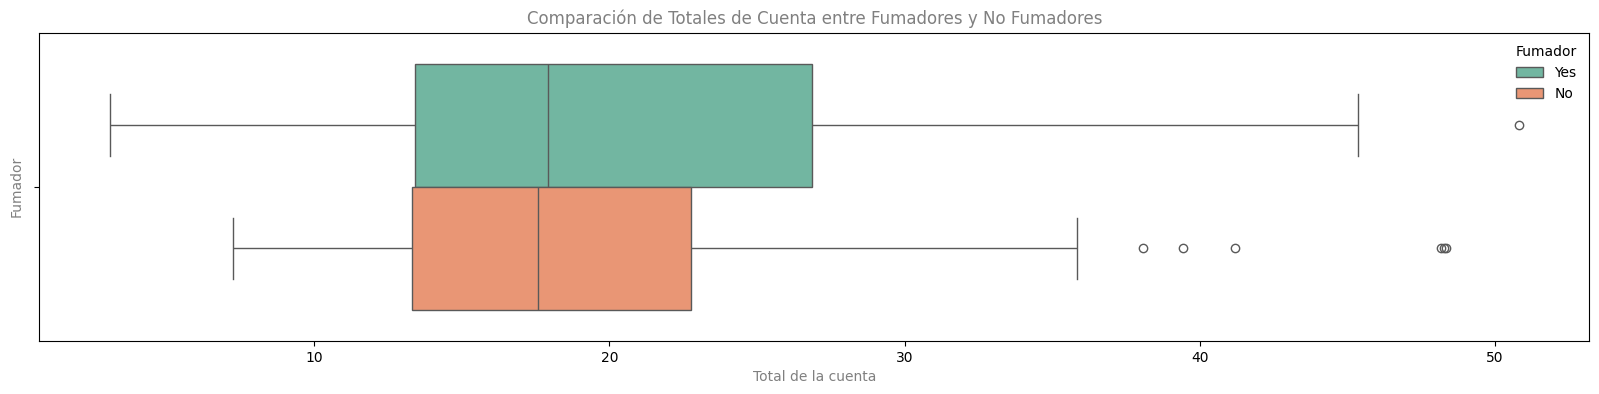

        count       mean       std   min     25%    50%     75%    max
smoker                                                                
Yes      93.0  20.756344  9.832154  3.07  13.420  17.92  26.860  50.81
No      151.0  19.188278  8.255582  7.25  13.325  17.59  22.755  48.33


In [27]:
#Crear un gráfico boxplot para comparar los totales de cuenta de fumadores y no fumadores
plt.figure(figsize=(20, 4))

sns.boxplot(x='total_bill', hue='smoker', data=df, palette='Set2')

plt.title('Comparación de Totales de Cuenta entre Fumadores y No Fumadores', color='grey')
plt.xlabel('Total de la cuenta', color='grey')
plt.ylabel('Fumador', color='grey')

# Ocultar la leyenda ya que no es necesaria
plt.legend(title='Fumador', loc='upper right', frameon=False)

plt.show()

# Calcular estadísticas descriptivas separadas por grupo de fumadores y no fumadores
summary_stats = df.groupby('smoker')['total_bill'].describe()
print(summary_stats)

<font color='darkviolet'> ***Respuesta:*** *Parece que no hay una diferencia considerable en el total de la cuenta entre fumadores y no fumadores. Aunque los fumadores, tienen una cuenta ligeramente mayor comparado con los no fumadores. Estos no son suficientes para concluir que ser fumador influye significativamente en el total de la cuenta. Recomiendo una analizis más profundo para poder llegar a una concluson más respaldada.*

In [28]:
#Analisis adicional: Prueba T de Student:
#Determinará si las diferencias en las medias de los totales de cuenta entre fumadores y no fumadores son estadísticamente significativas.
import pandas as pd
from scipy import stats

#Separar los totales de cuenta en dos grupos: fumadores y no fumadores.
total_cuenta_fumadores = df[df['smoker'] == 'Yes']['total_bill']
total_cuenta_nofumadores = df[df['smoker'] == 'No']['total_bill']

#Realizar la prueba T de Student.
t_stat, p_value = stats.ttest_ind(total_cuenta_fumadores, total_cuenta_nofumadores)

print(f'Estadística T: {t_stat}')
print(f'Valor P: {p_value}')

#Interpretar el valor P.
if p_value < 0.05:
    print('Existe una diferencia estadísticamente significativa entre los grupos.')
else:
    print('No existe una diferencia estadísticamente significativa entre los grupos.')

Estadística T: 1.338436383470007
Valor P: 0.18201032884302448
No existe una diferencia estadísticamente significativa entre los grupos.


**4. ¿Esta el total de la cuenta relacionado con la propina?**

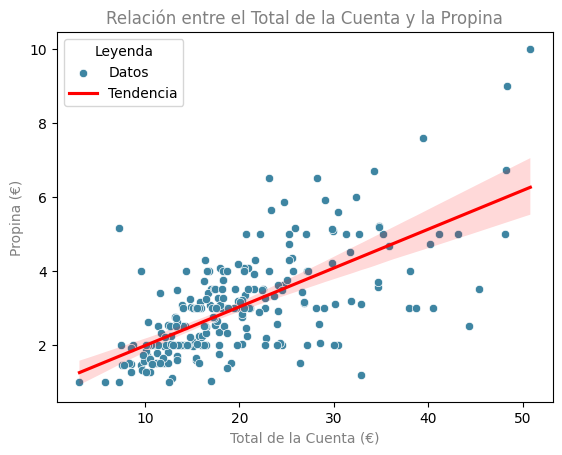

In [29]:
#Crear un gráfico de dispersión con seaborn
sns.scatterplot(x='total_bill', y='tip', data=df, color='#3E85A2', label='Datos')

#Mostrar la línea de tendencia
sns.regplot(x='total_bill', y='tip', data=df, scatter=False, color='red', label='Tendencia')

#Añadir títulos y etiquetas
plt.title('Relación entre el Total de la Cuenta y la Propina', color='grey')
plt.xlabel('Total de la Cuenta (€)', color='grey')
plt.ylabel('Propina (€)', color='grey')

#Añadir la leyenda
plt.legend(title='Leyenda')

#Mostrar el gráfico
plt.show()

<font color='darkviolet'> ***Respuesta:*** *El gráfico muestra una relación positiva entre el total de la cuenta y la propina, lo que indica que a medida que aumenta el total de la cuenta, la propina también tiende a aumentar. Esto sugiere que el total de la cuenta está relacionado con la propina y podría ser un buen predictor de la cantidad de propina que un cliente dejará. Es una tendencia común en la industria de restaurantes que las propinas se calculen como un porcentaje del total de la cuenta, lo que explicaría esta correlación positiva.*

**5. ¿Como es esta correlación entre propina y cuenta en función de si es horario de comida o de cena?**

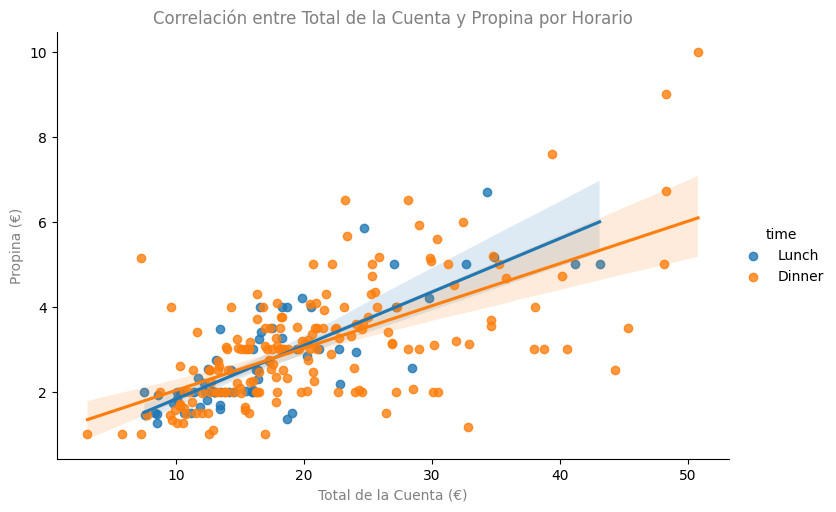

In [30]:
#Crear gráficos de dispersión separados por el horario de comida o cena
sns.lmplot(x='total_bill', y='tip', data=df, hue='time', aspect=1.5)

#Añadir títulos y etiquetas
plt.title('Correlación entre Total de la Cuenta y Propina por Horario', color='grey')
plt.xlabel('Total de la Cuenta (€)',color='grey')
plt.ylabel('Propina (€)',color='grey')

#Mostrar el gráfico
plt.show()

<font color='darkviolet'> ***Respuesta:*** *La correlación entre el total de la cuenta y la propina muestra una tendencia positiva tanto para el horario de comida como de cena. Sin embargo, la pendiente de la línea de tendencia es más pronunciada durante la cena, lo que sugiere que las propinas son más generosas en este horario. Esto podría indicar que los clientes están dispuestos a dejar mayores propinas por la experiencia de cenar fuera.*

**BONUS**: Dibuja un gráfico a tu elección con 2 variables numéricas y 2 categóricas (SUGERENCIA: utiliza `hue` y `style`). ¿Te parece útil?

In [31]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

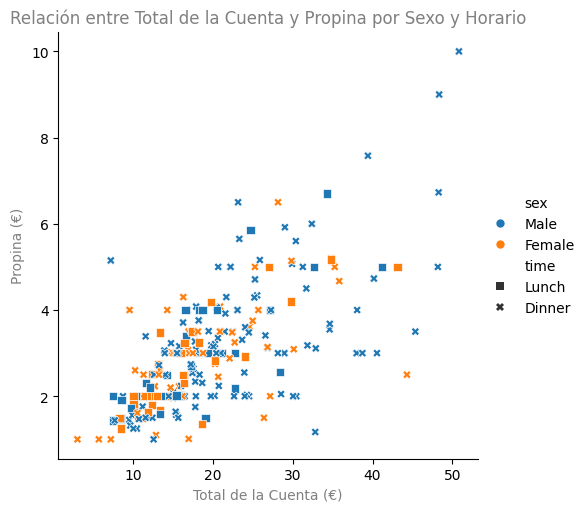

In [32]:
#Crear un gráfico de relación con Seaborn utilizando 'hue' para la variable categórica 'sex' y 'style' para 'time'
#Markadores diferentes para 'Lunch' y 'Dinner'
sns.relplot(x='total_bill', y='tip', hue='sex', style='time',
            markers={'Lunch': 's', 'Dinner': 'X'}, data=df)

#Añadir títulos y etiquetas
plt.title('Relación entre Total de la Cuenta y Propina por Sexo y Horario', color='grey')
plt.xlabel('Total de la Cuenta (€)', color='grey')
plt.ylabel('Propina (€)',color='grey')

#Mostrar el gráfico
plt.show()

#Este gráfico mostrará la relación entre el total de la cuenta y la propina, diferenciando los puntos por sexo usando diferentes colores (hue='sex') y por horario de comida o cena usando diferentes estilos de puntos (style='time').

<font color='darkviolet'> ***Conclusiones:*** *El gráfico es muy llamativo, pero es complicado entender los resultados; intentaré presentarlo de otra forma*

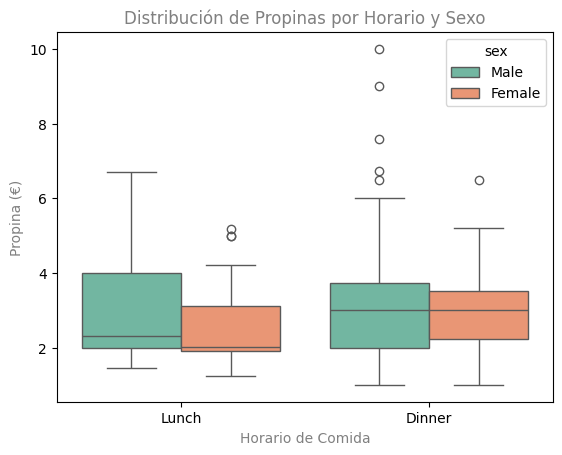

In [33]:
#Crear un gráfico de cajas para comparar las propinas por horario y sexo
sns.boxplot(x='time', y='tip', hue='sex', data=df, palette='Set2')

#Añadir títulos y etiquetas
plt.title('Distribución de Propinas por Horario y Sexo', color='grey')
plt.xlabel('Horario de Comida', color='grey')
plt.ylabel('Propina (€)', color='grey')

#Mostrar el gráfico
plt.show()


<font color='darkviolet'> ***Conclusiones:*** *El gráfico muestra la distribución de las propinas por horario y sexo. Existe variaciones en los patrones de propinas entre los diferentes horarios y entre géneros. Esto sugiere que el horario de la comida y el sexo del cliente pueden influir en la cantidad de propina que se deja. De la primera vista parece que los hombres suelen dejar más propina en general de que las mujeres. Para obtener conclusiones más detalladas, sería útil analizar la mediana, el rango intercuartílico, ya que estos elementos proporcionan información valiosa sobre las tendencias en los datos de propinas.*

In [34]:
# Calcular la mediana de las propinas por horario y sexo
mediana_propina = df.groupby(['time', 'sex'])['tip'].median().reset_index()
print("Mediana de las propinas por horario y sexo:")
print(mediana_propina)

# Calcular el IQR de las propinas por horario y sexo
iqr_propinas = df.groupby(['time', 'sex'])['tip'].quantile([0.25, 0.75]).unstack()
iqr_propinas['IQR'] = iqr_propinas[0.75] - iqr_propinas[0.25]
print("\nRango Intercuartílico (IQR) de las propinas por horario y sexo:")
print(iqr_propinas)

Mediana de las propinas por horario y sexo:
     time     sex   tip
0   Lunch    Male  2.31
1   Lunch  Female  2.01
2  Dinner    Male  3.00
3  Dinner  Female  3.00

Rango Intercuartílico (IQR) de las propinas por horario y sexo:
                0.25    0.75     IQR
time   sex                          
Lunch  Male    2.000  4.0000  2.0000
       Female  1.915  3.1150  1.2000
Dinner Male    2.000  3.7225  1.7225
       Female  2.230  3.5275  1.2975


<font color='darkviolet'> ***Conclusiones:*** *Las medianas de las propinas son similares entre hombres y mujeres durante la cena.Durante la comida, los hombres tienden a dejar una mediana de propina ligeramente mayor que las mujeres. Las propinas son más consistentes entre las mujeres en ambos horarios, con un IQR menor en comparación con los hombres. En general, las propinas son más altas durante la cena para ambos sexos, lo que podría reflejar una tendencia a dejar propinas más generosas en este horario.*

**En funcion de todos tus calculos:**

¿Qué día, en qué horario (cena o comida) y en qué zona del restaurante (fumadores no fumadores) elegirias trabajar?

<font color='darkviolet'> ***Respuesta:*** *Basándome en el análisis de los datos, si tuviera que elegir un día, horario y zona del restaurante para trabajar con el objetivo de maximizar las propinas elejiría lo siguiente:*

*  <font color='darkviolet'> *Trabajaría los **sábados**, ya que es el día con la mayor afluecia de clientes.*
*   *Elegiría el **turno de cena**, dado que las propinas tienden a ser más altas durante este horario.*
*   *Como los datos no muestran una diferencia significativa en el total de la cuenta entre fumadores y no fumadores, prefiero trabajar en la zona de **no fumadores** para evitar la exposición al humo.*



In [37]:
!jupyter nbconvert  --to html --no-input /content/Visualizacion_Python_Caso_practico1_zsofia.ipynb

[NbConvertApp] Converting notebook /content/Visualizacion_Python_Caso_practico1_zsofia.ipynb to html
[NbConvertApp] Writing 925927 bytes to /content/Visualizacion_Python_Caso_practico1_zsofia.html
